In [1]:
import string
import re
from pprint import pprint

import numpy as np
import matplotlib.pyplot as plt


In [2]:
with open('ritchies.txt', 'r') as filename:
    ritchies = filename.read()
    

In [3]:
# Preprocess texts
def preprocess(text):    
    
    text = text.lower()
    
    text= re.sub(r'&lt;','<',text)
    text= re.sub(r'&gt;','>',text)    
        
    punctuation ="\"#$%&\'()*+,-/:;<=>@[\]^_`{|}~"
    translator = str.maketrans({key: " " for key in punctuation})
    text = text.translate(translator)
    
    #translator = str.maketrans({key: " " for key in '0123456789'})
    #text = text.translate(translator)

    remove_list = [r'\bthe latin library\b', r'\bthe classics page\b', r'\bcicero\s+?$'] 
    for pattern in remove_list:
        text = re.sub(pattern, '', text)
    
    text = re.sub('[ ]+',' ', text) # Remove double spaces
    #text = re.sub('\s+\n+\s+','\n', text) # Remove double lines and trim spaces around new lines
    
    return text

def strip_punctuation(text):
    punctuation =".?!"
    translator = str.maketrans({key: " " for key in punctuation})
    text = text.translate(translator)
    

In [4]:
ritchies = preprocess(ritchies)


In [5]:
ritchies = ritchies.split('\n\n')

titles = ritchies[0::2]
stories = ritchies[1::2]


In [6]:
from cltk.tokenize.sentence import TokenizeSentence
from cltk.tokenize.word import WordTokenizer

sent_tokenizer = TokenizeSentence('latin')
word_tokenizer = WordTokenizer('latin')


In [7]:
sents = [sent_tokenizer.tokenize(story) for story in stories]

sent_lengths = []

for story in sents:
    temp = []
    for sent in story:
        temp.append(len(sent.split()))
    sent_lengths.append(temp)

avg_sent_length = [(sum(sent_length) / len(sent_length)) for sent_length in sent_lengths]


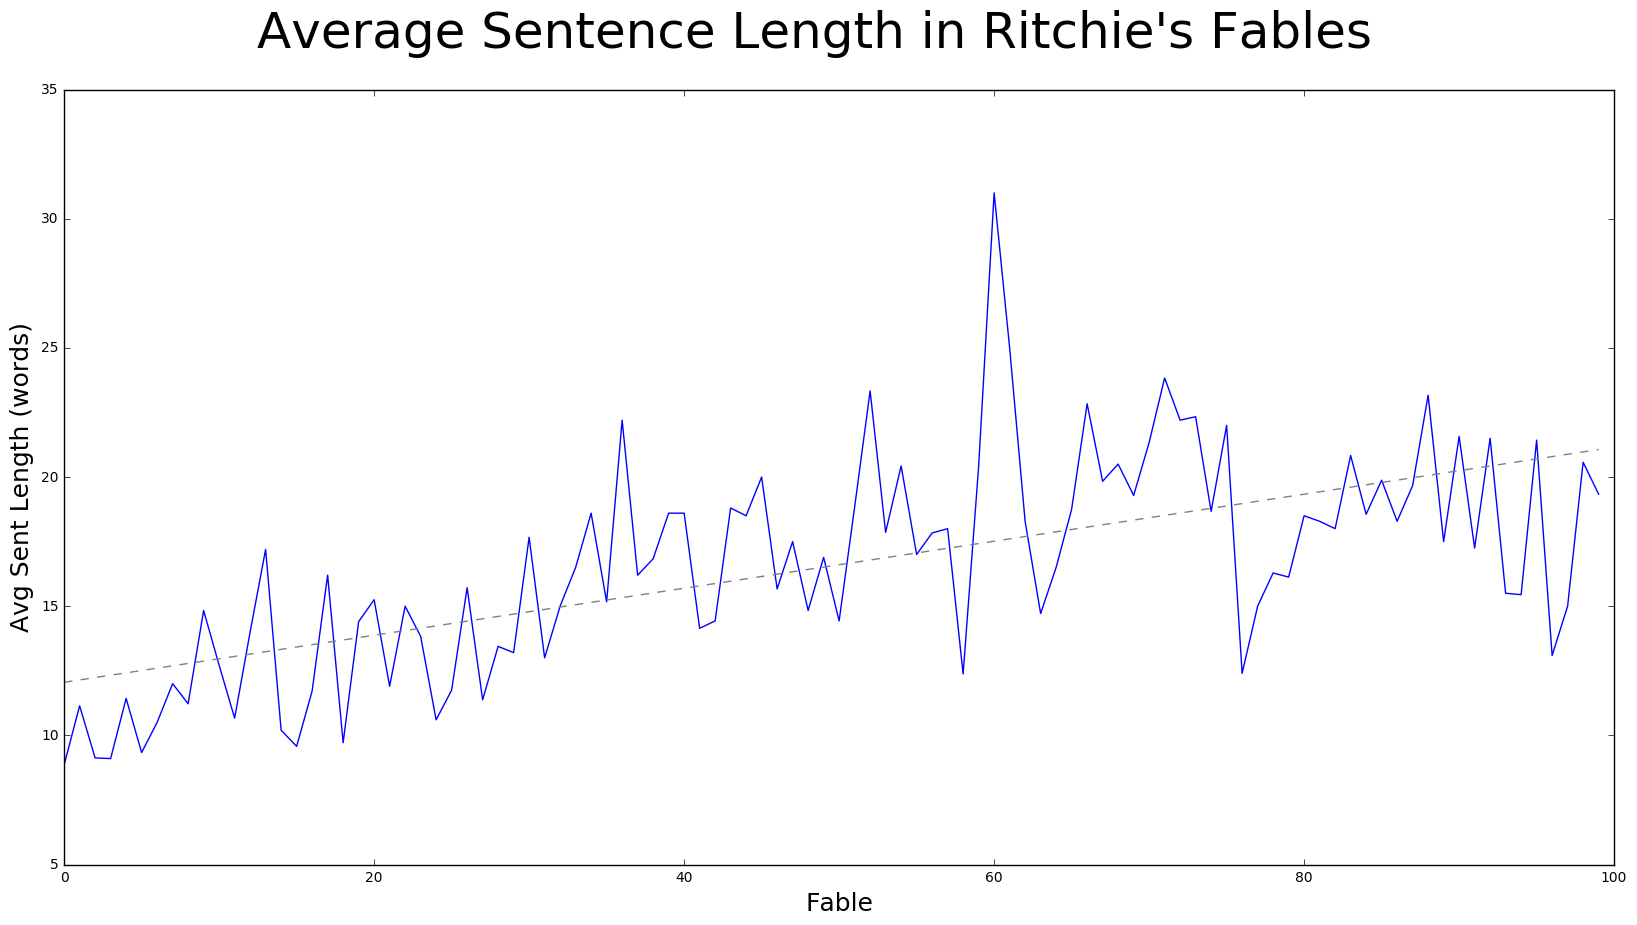

In [9]:
x = range(0,100)
y = avg_sent_length

slope, intercept = np.polyfit(x,y,1)
abline_values = [slope * i + intercept for i in x]

plt.figure(figsize=(20,10))

plt.plot(x,y)
plt.plot(x, abline_values, color='gray',ls='dashed')

plt.suptitle("Average Sentence Length in Ritchie's Fables", fontsize=36)
plt.xlabel('Fable', fontsize=18)
plt.ylabel('Avg Sent Length (words)', fontsize=18)

plt.show()


In [10]:
words = [word_tokenizer.tokenize(story) for story in stories]



word_lengths = []

for story in words:
    temp = [len(word) for word in story if word not in '.?!']
    word_lengths.append(temp)
    
avg_word_length = [(sum(word_length) / len(word_length)) for word_length in word_lengths]


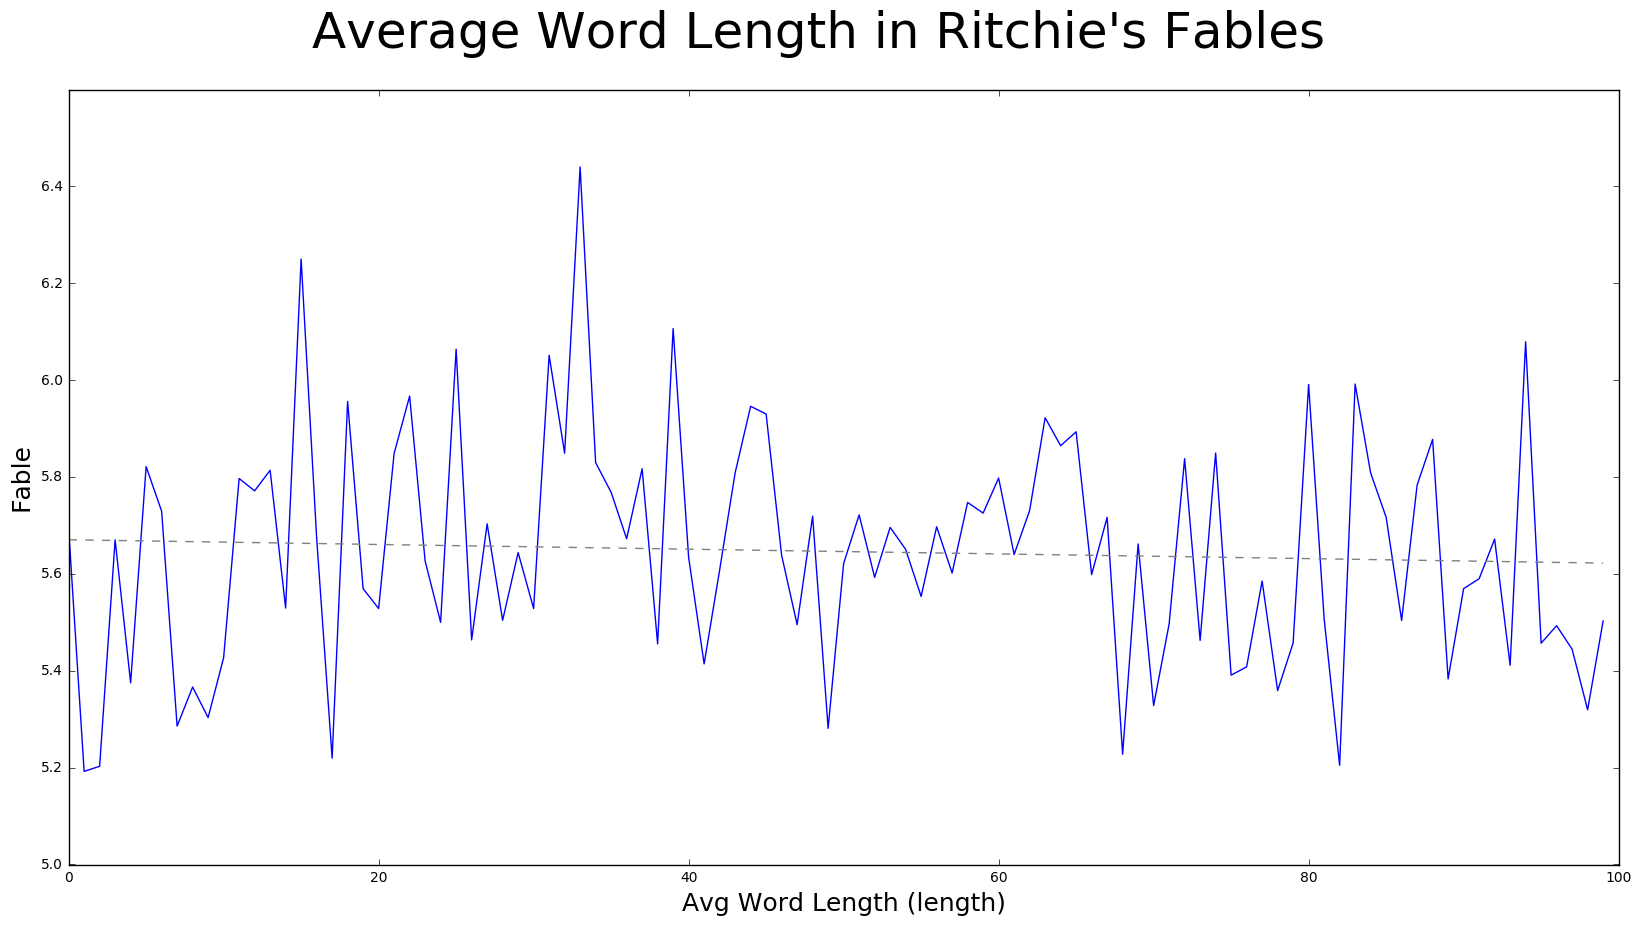

In [11]:
x = range(0,100)
y = avg_word_length

plt.figure(figsize=(20,10))

slope, intercept = np.polyfit(x,y,1)
abline_values = [slope * i + intercept for i in x]

plt.plot(x,y, '')
plt.plot(x, abline_values, color='gray',ls='dashed')

plt.suptitle("Average Word Length in Ritchie's Fables", fontsize=36)
plt.xlabel('Avg Word Length (length)', fontsize=18)
plt.ylabel('Fable', fontsize=18)

plt.show()


In [12]:
def sent_count(text):
    sents = sent_tokenizer.tokenize(text)
    return(len(sents))

def word_count(text):
    words = word_tokenizer.tokenize(text)
    return(len(words))

def char_count(text):
    return len(text)

def syll_count(text):
    return sum(letter in 'aeiouy' for letter in text.lower())

def comp_word_count(text):
    words = text.split()
    comp_words = [word for word in words if syll_count(word) > 3]
    return len(comp_words)


In [13]:
def ari(text):
    c, w, s = char_count(text), word_count(text), sent_count(text)
    score = 4.71 * (c / w) + 0.5 * (w / s) - 21.43
    return score


In [14]:
aris = []

for i, text in enumerate(stories):
    aris.append((titles[i],ari(text)))
               
aris.sort(key=lambda x: x[1])
pprint(aris[:5])               
pprint(aris[-5:])


[('3. perseus is sent on his travels', 10.346707317073168),
 ('2. jupiter saves his son', 11.793193277310927),
 ('1. the ark', 12.30465838509317),
 ('4. perseus gets his outfit', 12.392970297029706),
 ('15. hercules escapes sacrifice', 12.598214285714285)]
[('84. the one eyed giant', 21.126361323155216),
 ('73. the return to the argo', 21.191034482758617),
 ('62. a fatal mistake', 21.822692307692314),
 ('89. the blinding of polyphemus', 21.90174712643678),
 ('61. the anchor is weighed', 25.812955326460482)]


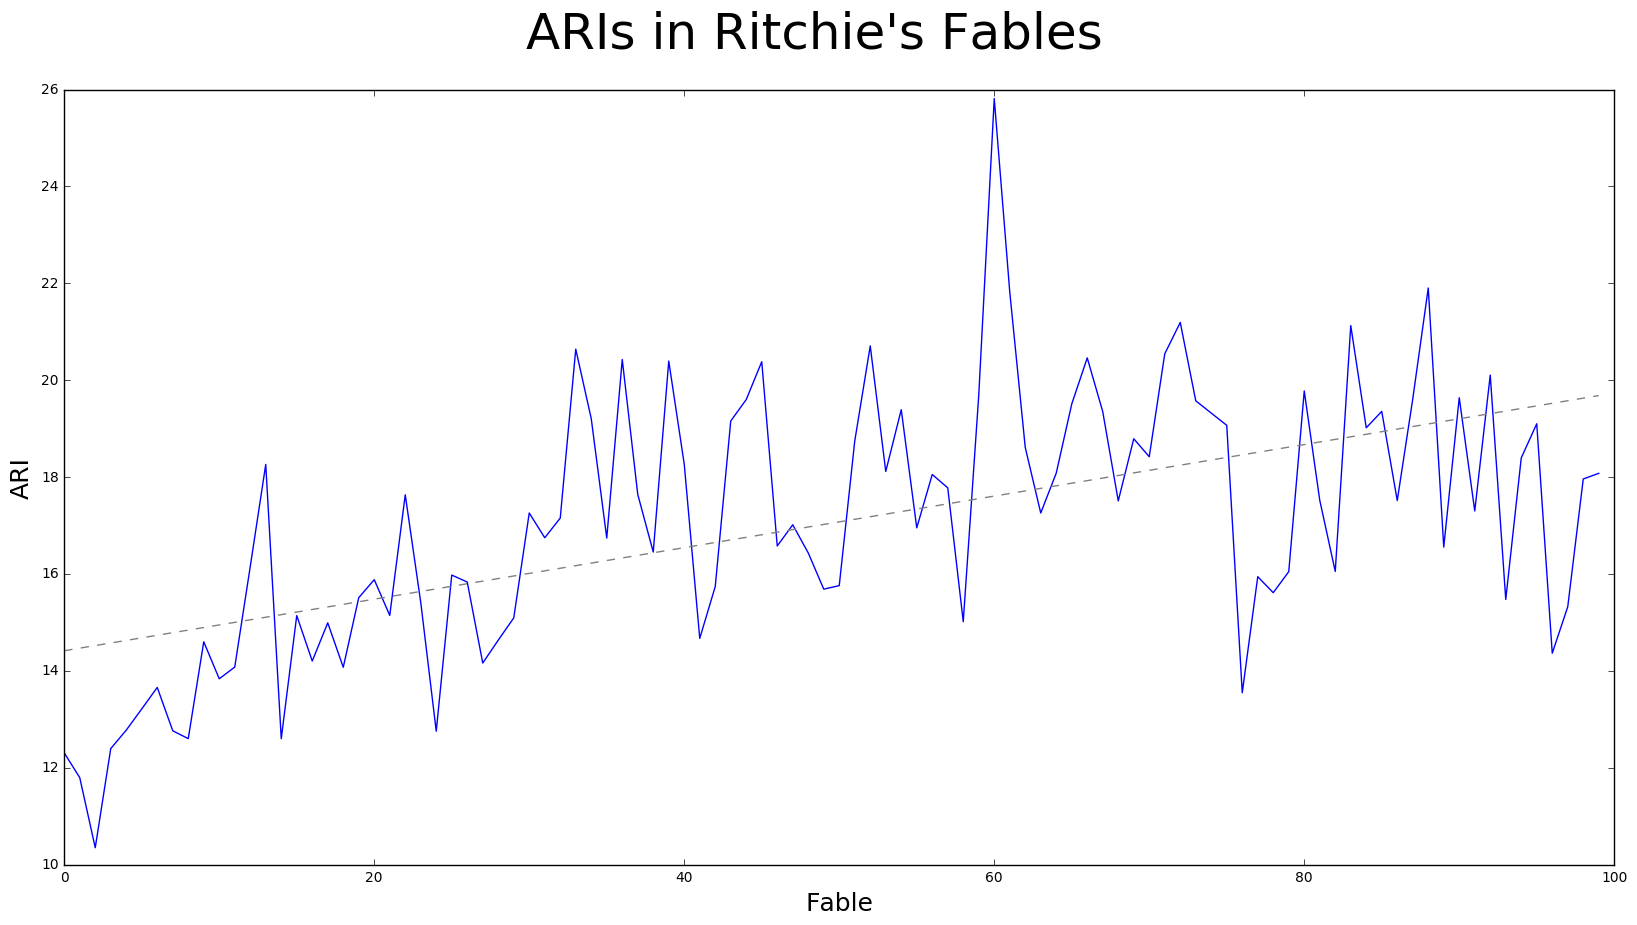

In [15]:
aris = [ari(story) for story in stories]

x = range(0,100)
y = aris

plt.figure(figsize=(20,10))

slope, intercept = np.polyfit(x,y,1)
abline_values = [slope * i + intercept for i in x]

plt.plot(x,y, '')
plt.plot(x, abline_values, color='gray',ls='dashed')

plt.suptitle("ARIs in Ritchie's Fables", fontsize=36)
plt.xlabel('Fable', fontsize=18)
plt.ylabel('ARI', fontsize=18)

plt.show()


In [16]:
wheelock_1 = "Labor me vocat. Mone me, amabo te, si erro. Festina lente. Laudas me; culpant me. Saepe peccamus. Quid debemus cogitare? Conservate me! Rumor volat. Me non amat. Nihil me terret. Apollo me saepe servat. Salvete, quid videtis? Nihil videmus. Saepe nihil cogitas. Bis das, si cito das. Si vales, valeo. Quid videt? Nihil dant. Me non laudare debes. Si erro, me saepe monet. Si me amas, serva me, amabo te."
wheelock_40 = "Quattuor causas reperio cur senectus misera videatur. Videamus quam iusta quaeque earum sit. Vereri videntur ut habeam satis praesidi. Necesse est enim sit alterum de duobus: aut mors sensus omnino aufert aut animus in alium locum morte abit. Si mors somno similis est sensusque exstinguuntur, di boni, quid lucri est mori! Aetas semper transitum et aliquid novi adfert. Nonne unum exemplum luxuriae aut cupiditatis multum mali facit? Miror tot milia virorum tam pueriliter identidem cupere currentes equos videre. Nonne vides etiam guttas, in saxa cadendo, pertundere illa saxa? Metuo ne id consili ceperimus quod non facile explicare possimus. Antonius, unus ex inimicis et vir minimae clementiae, iussit Ciceronem interfici et caput eius inter duas manus in Rostris poni. Omnes qui habent aliquid non solum sapientiae sed etiam sanitatis volunt hanc rem publicam salvam esse. Salve, nec minimo puella naso nec bello pede nec nigris ocellis nec longis digitis nec ore sicco! Homo sum; nihil humani alienum a me puto. Amicus animum amici ita cum suo miscet quasi facit unum ex duobus. Sex diebus fecit Dominus caelum et terram et mare et omnia quae in eis sunt, et requievit die septimo. Misit legatum Valerium Procillum, summa virtute et humanitate adulescentem, cum imperatore hostium colloquendi causa. Num negare audes? Quid taces? Convincam, si negas; video enim esse hic in senatu quosdam qui tecum una fuerunt. O di immortales! Nunc timeo ne nihil tibi praeter lacrimas queam reddere."

In [17]:
ari(wheelock_1)

0.051300000000001234

In [18]:
ari(wheelock_40)

11.136098901098904

In [19]:
wheelock_1_words = word_tokenizer.tokenize(wheelock_1)
wheelock_1_words_length = [len(word) for word in wheelock_1_words if word not in string.punctuation]
print(sum(wheelock_1_words_length) / len(wheelock_1_words_length))

4.3428571428571425


In [20]:
wheelock_40_words = word_tokenizer.tokenize(wheelock_40)
wheelock_40_words_length = [len(word) for word in wheelock_40_words if word not in string.punctuation]
print(sum(wheelock_40_words_length) / len(wheelock_40_words_length))

5.160337552742616


In [21]:
#print(wheelock_1_words)
print(wheelock_1_words_length)
print(np.median(wheelock_1_words_length))
print(np.mean(wheelock_1_words_length))
print(np.std(wheelock_1_words_length))

[5, 2, 5, 4, 2, 5, 2, 2, 4, 7, 5, 6, 2, 7, 2, 5, 8, 4, 7, 8, 10, 2, 5, 5, 2, 3, 4, 5, 2, 6, 6, 2, 5, 6, 7, 4, 7, 5, 7, 5, 5, 7, 3, 3, 2, 4, 3, 2, 5, 5, 4, 5, 5, 4, 2, 3, 7, 5, 2, 4, 2, 5, 5, 2, 2, 4, 5, 2, 5, 2]
5.0
4.34285714286
1.88895824869


In [22]:
#print(wheelock_40_words)
print(wheelock_40_words_length)
print(np.median(wheelock_40_words_length))
print(np.mean(wheelock_40_words_length))
print(np.std(wheelock_40_words_length))

[8, 6, 7, 3, 8, 6, 8, 8, 4, 5, 7, 5, 3, 6, 8, 2, 6, 5, 8, 7, 3, 4, 3, 7, 2, 6, 3, 4, 6, 6, 6, 3, 6, 2, 5, 5, 5, 4, 2, 4, 5, 7, 3, 6, 4, 13, 2, 4, 4, 5, 3, 4, 5, 6, 9, 2, 7, 4, 6, 5, 4, 8, 8, 3, 11, 6, 4, 5, 5, 3, 5, 7, 3, 10, 9, 6, 9, 5, 6, 5, 5, 5, 6, 2, 4, 7, 10, 4, 4, 5, 2, 2, 7, 9, 4, 3, 6, 9, 8, 8, 4, 2, 8, 2, 3, 7, 10, 6, 9, 9, 2, 5, 4, 5, 4, 5, 2, 7, 4, 5, 3, 6, 7, 3, 5, 10, 3, 5, 9, 6, 4, 3, 8, 6, 4, 5, 3, 6, 6, 4, 3, 5, 4, 3, 6, 7, 3, 6, 7, 3, 3, 5, 4, 3, 5, 6, 7, 1, 2, 4, 6, 6, 5, 3, 3, 3, 6, 5, 5, 4, 2, 6, 3, 6, 5, 7, 6, 2, 6, 2, 4, 2, 5, 4, 2, 3, 4, 2, 9, 3, 7, 5, 7, 8, 9, 5, 7, 2, 10, 12, 3, 10, 7, 11, 5, 3, 6, 5, 4, 5, 9, 2, 5, 5, 4, 4, 3, 2, 6, 7, 3, 3, 2, 3, 7, 1, 2, 10, 4, 5, 2, 5, 4, 7, 8, 5, 7]
5.0
5.16033755274
2.27989485748
